## 단순 선형회귀 - 당뇨병 사례

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns= diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [16]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


- 당뇨병 (target) vs BMI

In [17]:
X = df.bmi.values.reshape(-1,1)
y = diabetes.target
X.shape, y.shape

((442, 1), (442,))

- 1) 모든 x, y 데이터

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [19]:
weight, bias = lr.coef_[0], lr.intercept_
rss = lr._residues
weight, bias, rss

(949.4352603839491, 152.1334841628967, 1719581.810773882)

In [20]:
lr.score(X,y)

0.3439237602253803

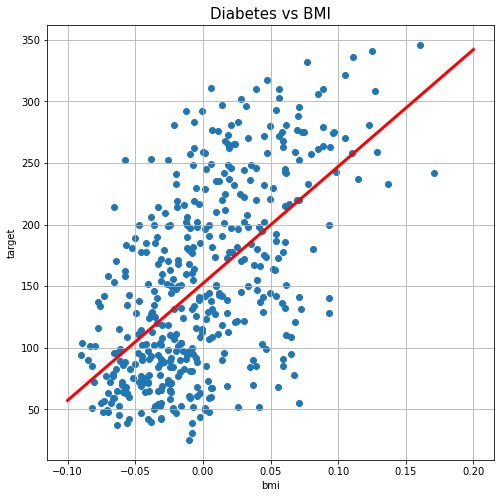

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(df.bmi, df.target)
plt.plot([-0.1, 0.2], [-0.1*weight+bias,0.2*weight+bias],'r-',lw=3)
plt.grid()
plt.xlabel("bmi")
plt.ylabel("target")
plt.title('Diabetes vs BMI', fontsize=15)
plt.show()

- 2.train/test dataset 분리, test_size=0.1

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=2021
)

In [23]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [24]:
pred = lr2.predict(X_test)

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.17874580965139086

In [26]:
lr2.score(X_test, y_test)

0.17874580965139086

In [28]:
from  sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)             #Root mean squared error
mse, rmse

(3577.1382963531237, 59.809182374892266)

- 당뇨병 vs BP

In [29]:
X = df.bp.values.reshape(-1,1)
X.shape

(442, 1)

In [30]:
lr3 = LinearRegression()
lr3.fit(X,y)

LinearRegression()

In [31]:
weight3, bias3 = lr3.coef_[0], lr3.intercept_
rss3 = lr3._residues
weight3, bias3, rss3

(714.7416437042881, 152.13348416289585, 2110153.507189273)

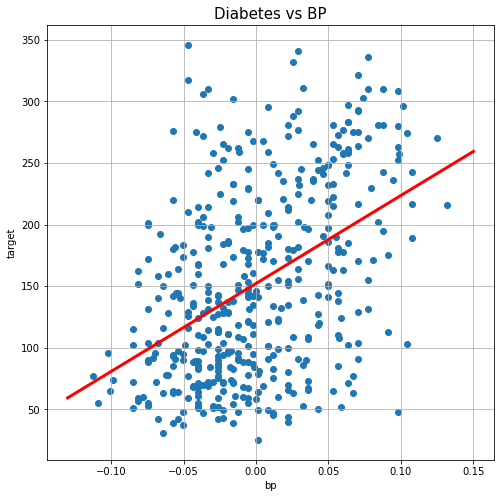

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(df.bp, df.target)
plt.plot([-0.13, 0.15], [-0.13*weight3+bias3,0.15*weight3+bias3],'r-',lw=3)
plt.grid()
plt.xlabel("bp")
plt.ylabel("target")
plt.title('Diabetes vs BP', fontsize=15)
plt.show()

In [35]:
lr3.score(X,y)

0.19490798886682947